In [2]:

import os
import math
# Essential Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Preprocessing
from sklearn.preprocessing import MinMaxScaler
# Algorithms
from minisom import MiniSom
from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans
from sklearn.metrics import pairwise_distances_argmin_min


In [3]:
aggre_data = pd.read_csv('/blue/bianjiang/leyang.sun/aggreg_data.csv')

In [34]:
cont_cols = ['Index_age','BP_Diastolic', 'Triglycerides', 'HDL', 
             'BMI', 'GFR', 'LDL', 'med_Metformin', 'med_Thiazolidinedione', 
             'med_DPP4i', 'med_RAS', 'med_non_loops', 'med_Sulfonylurea', 
             'med_lipid', 'med_Loop', 'med_CCB', 'med_Beta_blockers','HbA1c']
disc_cols = ['comp_Alcohol_use_disorder', 'comp_Pregnancy', 'comp_Angina_flag',
            'comp_Blindness_and_vision_loss', 'comp_Congestive_heart_failure',
            'comp_Depression', 'comp_Myocardial_Infarction_MI', 'comp_Cardiac_revascularization',
            'comp_History_of_Myocardial_Infarction', 'comp_Obesity',
            'comp_Cerebrovascular_Disease', 'comp_Hypoglycemia', 
            'comp_Lower_extremity_amputation', 'comp_Hypertension',
            'comp_Exercise_x', 'comp_Photocoagulation', 'comp_Exercise_y',
            'comp_Foot_ulcer', 'comp_History_of_stroke', 'comp_Cancer', 
            'comp_Hypercholesterolaemia', 'comp_Visual_impairment', 
            'comp_End_Stage_Renal_Disease', 'comp_Cardiovascular_Disease', 
            'comp_Retinopathy_intravitreal_injections', 'comp_Drug_use_disorder', 
            'comp_Organ_transplant', 'comp_Ketoacidosis', 'comp_Neuropathy', 
            'comp_Stroke', 'comp_Secondary_diabetes', 'comp_Atrial_fibrillation', 
            'comp_Chronic_kidney_disease', 'comp_Peripheral_vascular_disease', 
            'comp_Gestational_diabetes', 'comp_Nephropathy', 'comp_Retinopathy']
total_col= cont_cols + disc_cols

In [4]:
# Group by 'deid_pat_ID' and count the timestamps
timestamp_counts = aggre_data.groupby('deid_pat_ID')['timestamp'].count().reset_index()
timestamp_counts.columns = ['deid_pat_ID', 'timestamp_count']

# Display the result
print(timestamp_counts)

                  deid_pat_ID  timestamp_count
0      IRB202003281_PAT_10006                8
1      IRB202003281_PAT_10010                1
2      IRB202003281_PAT_10045                8
3      IRB202003281_PAT_10055               14
4      IRB202003281_PAT_10065               11
...                       ...              ...
10149   IRB202003281_PAT_9968               13
10150   IRB202003281_PAT_9972               24
10151   IRB202003281_PAT_9974               10
10152   IRB202003281_PAT_9982                1
10153   IRB202003281_PAT_9997               26

[10154 rows x 2 columns]


In [5]:
merged_df = aggre_data.merge(timestamp_counts, on='deid_pat_ID', how='left')

# Then, filter the rows where 'timestamp_count' is greater than or equal to 3
filtered_df = merged_df[merged_df['timestamp_count'] >= 6]

# Drop the 'timestamp_count' column if you no longer need it
filtered_df = filtered_df.drop('timestamp_count', axis=1)

In [12]:
print(len(filtered_df["deid_pat_ID"].unique())) # 8101 patients and 147931 records

8101


In [14]:
print(filtered_df.index)

Index([     0,      1,      2,      3,      4,      5,      6,      7,      9,
           10,
       ...
       152129, 152130, 152131, 152132, 152133, 152134, 152135, 152136, 152137,
       152138],
      dtype='int64', length=147931)


In [35]:
# Sort the DataFrame by 'Patient_ID' and 'time'
filtered_df_sorted = filtered_df.sort_values(by=['deid_pat_ID', 'timestamp'])
filtered_df_sorted = filtered_df.reset_index(drop=True)
filtered_df_grouped = filtered_df_sorted.groupby("deid_pat_ID")

# Apply interpolation within each patient's group
filtered_df_interpolated = filtered_df_grouped.apply(lambda group: group.interpolate())
filtered_df_interpolated = filtered_df_interpolated.reset_index(drop=True)

for column in cont_cols:
    median = filtered_df_interpolated[column].median()
    filtered_df_interpolated[column].fillna(median, inplace=True)

In [46]:
print(numeric_df.columns)

Index(['Index_age', 'BP_Diastolic', 'Triglycerides', 'HDL', 'BMI', 'GFR',
       'LDL', 'med_Metformin', 'med_Thiazolidinedione', 'med_DPP4i', 'med_RAS',
       'med_non_loops', 'med_Sulfonylurea', 'med_lipid', 'med_Loop', 'med_CCB',
       'med_Beta_blockers', 'HbA1c'],
      dtype='object')


In [45]:
import numpy as np
from sklearn.preprocessing import StandardScaler
# Scale the numerical values (optional, but often recommended for KMeans)
# Assuming 'df' is your DataFrame
# Drop non-numeric columns

numeric_df = filtered_df_interpolated[cont_cols]
scaler = StandardScaler()
numeric_df_scaled = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)

# Now 'numeric_df_scaled' is ready for clustering
# Convert it to a NumPy array if needed
data_for_clustering = numeric_df_scaled.astype(np.float32).to_numpy()

# Instantiate the ConsensusCluster class and fit the data
consensus_cluster = ConsensusCluster(cluster=KMeans, L=3, K=10, H=10, resample_proportion=0.8)
consensus_cluster.fit(data_for_clustering, verbose=True)

MemoryError: Unable to allocate 1.27 TiB for an array with shape (8, 147931, 147931) and data type float64

In [51]:
# Downsample the data to a smaller size (adjust as needed)
downsampled_data = numeric_df.sample(n=10000, random_state=42)

# Scale the numerical values using float32
scaler = StandardScaler()
numeric_df_scaled = pd.DataFrame(scaler.fit_transform(downsampled_data), columns=downsampled_data.columns)

# Convert to float32
data_for_clustering = numeric_df_scaled.astype(np.float32).to_numpy()

# Instantiate the ConsensusCluster class and fit the data
consensus_cluster = ConsensusCluster(cluster=KMeans, L=3, K=10, H=10, resample_proportion=0.8)
consensus_cluster.fit(data_for_clustering, verbose=True)

At k = 3, aka. iteration = 0
	At resampling h = 0, (k = 3)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 1, (k = 3)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 2, (k = 3)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 3, (k = 3)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 4, (k = 3)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 5, (k = 3)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 6, (k = 3)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 7, (k = 3)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 8, (k = 3)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 9, (k = 3)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


At k = 4, aka. iteration = 1
	At resampling h = 0, (k = 4)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 1, (k = 4)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 2, (k = 4)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 3, (k = 4)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 4, (k = 4)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 5, (k = 4)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 6, (k = 4)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 7, (k = 4)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 8, (k = 4)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 9, (k = 4)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


At k = 5, aka. iteration = 2
	At resampling h = 0, (k = 5)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 1, (k = 5)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 2, (k = 5)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 3, (k = 5)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 4, (k = 5)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 5, (k = 5)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 6, (k = 5)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 7, (k = 5)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 8, (k = 5)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 9, (k = 5)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


At k = 6, aka. iteration = 3
	At resampling h = 0, (k = 6)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 1, (k = 6)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 2, (k = 6)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 3, (k = 6)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 4, (k = 6)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 5, (k = 6)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 6, (k = 6)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 7, (k = 6)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 8, (k = 6)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 9, (k = 6)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


At k = 7, aka. iteration = 4
	At resampling h = 0, (k = 7)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 1, (k = 7)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 2, (k = 7)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 3, (k = 7)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 4, (k = 7)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 5, (k = 7)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 6, (k = 7)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 7, (k = 7)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 8, (k = 7)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 9, (k = 7)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


At k = 8, aka. iteration = 5
	At resampling h = 0, (k = 8)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 1, (k = 8)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 2, (k = 8)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 3, (k = 8)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 4, (k = 8)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 5, (k = 8)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 6, (k = 8)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 7, (k = 8)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 8, (k = 8)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 9, (k = 8)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


At k = 9, aka. iteration = 6
	At resampling h = 0, (k = 9)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 1, (k = 9)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 2, (k = 9)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 3, (k = 9)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 4, (k = 9)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 5, (k = 9)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 6, (k = 9)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 7, (k = 9)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 8, (k = 9)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


	At resampling h = 9, (k = 9)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/scratch/local/13183604/ipykernel_267049/3833368826.py:105: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  self.Ak[i] = np.sum(h*(b-a)


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


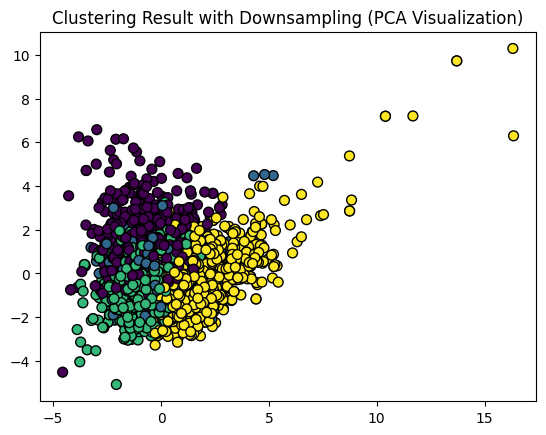

In [54]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'consensus_cluster' is your fitted ConsensusCluster instance
downsampled_clusters = consensus_cluster.predict_data(data_for_clustering)

# Apply PCA for visualization (reduce to 2D)
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_for_clustering)

# Visualize the data and predicted clusters
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=downsampled_clusters, cmap='viridis', edgecolors='k', s=50)
plt.title('Clustering Result with Downsampling (PCA Visualization)')
plt.show()

In [53]:
best_cluster_count = consensus_cluster.bestK

print(f"The best number of clusters is: {best_cluster_count}")

The best number of clusters is: 4


/home/leyang.sun/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


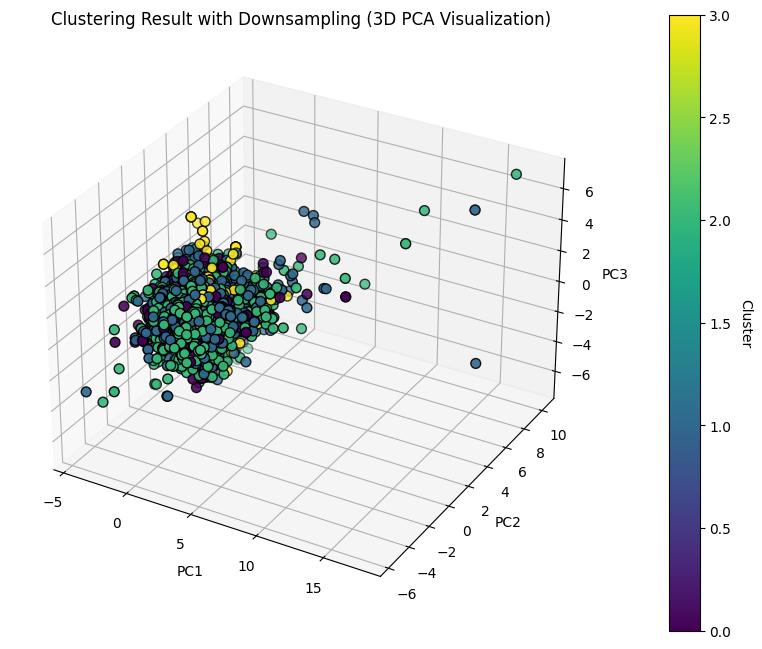

In [52]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # for 3D scatter plot
from sklearn.decomposition import PCA

# Assuming 'consensus_cluster' is your fitted ConsensusCluster instance
downsampled_clusters = consensus_cluster.predict_data(data_for_clustering)

# Apply PCA for visualization (reduce to 3D)
pca = PCA(n_components=3)
data_3d = pca.fit_transform(data_for_clustering)

# Visualize the data and predicted clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], c=downsampled_clusters, cmap='viridis', edgecolors='k', s=50)

# Add colorbar
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Cluster', rotation=270, labelpad=15)

ax.set_title('Clustering Result with Downsampling (3D PCA Visualization)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()


In [36]:
print(len(df_first_six["deid_pat_ID"].unique())) # 8101 patients and 48606 records
print(df_first_six.index)

8101
Index([     0,      1,      2,      3,      4,      5,      8,      9,     10,
           11,
       ...
       147897, 147898, 147899, 147900, 147905, 147906, 147907, 147908, 147909,
       147910],
      dtype='int64', length=48606)


In [37]:
# Keep only the first six time points for each patient
df_first_six = filtered_df_interpolated[filtered_df_interpolated['timestamp'] <= 6]

In [38]:
# prepare nparray for only continuous columns
df_first_six_ctn = df_first_six[cont_cols]
print(df_first_six_ctn.head)

<bound method NDFrame.head of         Index_age  BP_Diastolic  Triglycerides   HDL    BMI    GFR   LDL  \
0            48.0          79.0          308.0  46.0  38.92  102.0  94.0   
1            48.0          79.0          308.0  46.0  38.92  102.0  94.0   
2            48.0          79.0          308.0  46.0  38.92  102.0  94.0   
3            48.0          79.0          308.0  46.0  38.92  102.0  94.0   
4            48.0          79.0          308.0  46.0  38.92  102.0  94.0   
...           ...           ...            ...   ...    ...    ...   ...   
147906       47.0          70.0          113.0  50.0  40.98   60.0  66.0   
147907       47.0          70.0          113.0  50.0  40.98   60.0  66.0   
147908       47.0          70.0          113.0  50.0  40.98   60.0  66.0   
147909       47.0          70.0          113.0  50.0  40.98   60.0  66.0   
147910       47.0          70.0          113.0  50.0  40.98   60.0  66.0   

        med_Metformin  med_Thiazolidinedione      med_DPP

In [16]:
df_first_six_outcome = df_first_six[["deid_pat_ID", "timestamp", "HbA1c" ]]
reshaped_df = df_first_six.pivot(index='deid_pat_ID', columns='timestamp', values='HbA1c')

In [17]:
df_first_six_ctn = df_first_six[["deid_pat_ID", "timestamp", "HbA1c",'BP_Diastolic', 'Triglycerides', 'HDL', 
             'BMI', 'GFR', 'LDL' ]]

In [18]:
df_first_six_dis = df_first_six[['comp_Alcohol_use_disorder', 'comp_Pregnancy', 'comp_Angina_flag',
            'comp_Blindness_and_vision_loss', 'comp_Congestive_heart_failure',
            'comp_Depression', 'comp_Myocardial_Infarction_MI', 'comp_Cardiac_revascularization',
            'comp_History_of_Myocardial_Infarction', 'comp_Obesity',
            'comp_Cerebrovascular_Disease', 'comp_Hypoglycemia', 
            'comp_Lower_extremity_amputation', 'comp_Hypertension',
            'comp_Exercise_x', 'comp_Photocoagulation', 'comp_Exercise_y',
            'comp_Foot_ulcer', 'comp_History_of_stroke', 'comp_Cancer', 
            'comp_Hypercholesterolaemia', 'comp_Visual_impairment', 
            'comp_End_Stage_Renal_Disease', 'comp_Cardiovascular_Disease', 
            'comp_Retinopathy_intravitreal_injections', 'comp_Drug_use_disorder', 
            'comp_Organ_transplant', 'comp_Ketoacidosis', 'comp_Neuropathy', 
            'comp_Stroke', 'comp_Secondary_diabetes', 'comp_Atrial_fibrillation', 
            'comp_Chronic_kidney_disease', 'comp_Peripheral_vascular_disease', 
            'comp_Gestational_diabetes', 'comp_Nephropathy', 'comp_Retinopathy' ]]

In [21]:
###############################################
# Copyright Žiga Sajovic, XLAB 2019           #
# Distributed under the MIT License           #
#                                             #
# github.com/ZigaSajovic/Consensus_Clustering #
#                                             #
###############################################

import numpy as np
from itertools import combinations
import bisect


class ConsensusCluster:
    """
      Implementation of Consensus clustering, following the paper
      https://link.springer.com/content/pdf/10.1023%2FA%3A1023949509487.pdf
      Args:
        * cluster -> clustering class
        * NOTE: the class is to be instantiated with parameter `n_clusters`,
          and possess a `fit_predict` method, which is invoked on data.
        * L -> smallest number of clusters to try
        * K -> biggest number of clusters to try
        * H -> number of resamplings for each cluster number
        * resample_proportion -> percentage to sample
        * Mk -> consensus matrices for each k (shape =(K,data.shape[0],data.shape[0]))
                (NOTE: every consensus matrix is retained, like specified in the paper)
        * Ak -> area under CDF for each number of clusters 
                (see paper: section 3.3.1. Consensus distribution.)
        * deltaK -> changes in areas under CDF
                (see paper: section 3.3.1. Consensus distribution.)
        * self.bestK -> number of clusters that was found to be best
      """

    def __init__(self, cluster, L, K, H, resample_proportion=0.5):
        assert 0 <= resample_proportion <= 1, "proportion has to be between 0 and 1"
        self.cluster_ = cluster
        self.resample_proportion_ = resample_proportion
        self.L_ = L
        self.K_ = K
        self.H_ = H
        self.Mk = None
        self.Ak = None
        self.deltaK = None
        self.bestK = None

    def _internal_resample(self, data, proportion):
        """
        Args:
          * data -> (examples,attributes) format
          * proportion -> percentage to sample
        """
        resampled_indices = np.random.choice(
            range(data.shape[0]), size=int(data.shape[0]*proportion), replace=False)
        return resampled_indices, data[resampled_indices, :]

    def fit(self, data, verbose=False):
        """
        Fits a consensus matrix for each number of clusters

        Args:
          * data -> (examples,attributes) format
          * verbose -> should print or not
        """
        Mk = np.zeros((self.K_-self.L_, data.shape[0], data.shape[0]))
        Is = np.zeros((data.shape[0],)*2)
        for k in range(self.L_, self.K_):  # for each number of clusters
            i_ = k-self.L_
            if verbose:
                print("At k = %d, aka. iteration = %d" % (k, i_))
            for h in range(self.H_):  # resample H times
                if verbose:
                    print("\tAt resampling h = %d, (k = %d)" % (h, k))
                resampled_indices, resample_data = self._internal_resample(
                    data, self.resample_proportion_)
                Mh = self.cluster_(n_clusters=k).fit_predict(resample_data)
                # find indexes of elements from same clusters with bisection
                # on sorted array => this is more efficient than brute force search
                index_mapping = np.array((Mh, resampled_indices)).T
                index_mapping = index_mapping[index_mapping[:, 0].argsort()]
                sorted_ = index_mapping[:, 0]
                id_clusts = index_mapping[:, 1]
                for i in range(k):  # for each cluster
                    ia = bisect.bisect_left(sorted_, i)
                    ib = bisect.bisect_right(sorted_, i)
                    is_ = id_clusts[ia:ib]
                    ids_ = np.array(list(combinations(is_, 2))).T
                    # sometimes only one element is in a cluster (no combinations)
                    if ids_.size != 0:
                        Mk[i_, ids_[0], ids_[1]] += 1
                # increment counts
                ids_2 = np.array(list(combinations(resampled_indices, 2))).T
                Is[ids_2[0], ids_2[1]] += 1
            Mk[i_] /= Is+1e-8  # consensus matrix
            # Mk[i_] is upper triangular (with zeros on diagonal), we now make it symmetric
            Mk[i_] += Mk[i_].T
            Mk[i_, range(data.shape[0]), range(
                data.shape[0])] = 1  # always with self
            Is.fill(0)  # reset counter
        self.Mk = Mk
        # fits areas under the CDFs
        self.Ak = np.zeros(self.K_-self.L_)
        for i, m in enumerate(Mk):
            hist, bins = np.histogram(m.ravel(), density=True)
            self.Ak[i] = np.sum(h*(b-a)
                             for b, a, h in zip(bins[1:], bins[:-1], np.cumsum(hist)))
        # fits differences between areas under CDFs
        self.deltaK = np.array([(Ab-Aa)/Aa if i > 2 else Aa
                                for Ab, Aa, i in zip(self.Ak[1:], self.Ak[:-1], range(self.L_, self.K_-1))])
        self.bestK = np.argmax(self.deltaK) + \
            self.L_ if self.deltaK.size > 0 else self.L_

    def predict(self):
        """
        Predicts on the consensus matrix, for best found cluster number
        """
        assert self.Mk is not None, "First run fit"
        return self.cluster_(n_clusters=self.bestK).fit_predict(
            1-self.Mk[self.bestK-self.L_])

    def predict_data(self, data):
        """
        Predicts on the data, for best found cluster number
        Args:
          * data -> (examples,attributes) format 
        """
        assert self.Mk is not None, "First run fit"
        return self.cluster_(n_clusters=self.bestK).fit_predict(
            data)

In [31]:
print(df_first_six_ctn.head)

<bound method NDFrame.head of                    deid_pat_ID  timestamp  HbA1c  BP_Diastolic  Triglycerides  \
0       IRB202003281_PAT_10006          1    6.7           NaN          308.0   
1       IRB202003281_PAT_10006          2    6.7           NaN          308.0   
2       IRB202003281_PAT_10006          3    6.7           NaN          308.0   
3       IRB202003281_PAT_10006          4    6.7           NaN          308.0   
4       IRB202003281_PAT_10006          5    6.7           NaN          308.0   
...                        ...        ...    ...           ...            ...   
147906   IRB202003281_PAT_9997          2   10.7          70.0          113.0   
147907   IRB202003281_PAT_9997          3   10.7          70.0          113.0   
147908   IRB202003281_PAT_9997          4   10.7          70.0          113.0   
147909   IRB202003281_PAT_9997          5   10.7          70.0          113.0   
147910   IRB202003281_PAT_9997          6   10.7          70.0          113.0  

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

# Generate sample data for illustration purposes
data, ground_truth_labels = make_blobs(n_samples=300, centers=3, random_state=42)

# Instantiate the ConsensusCluster class with your clustering algorithm
consensus_cluster = ConsensusCluster(cluster=KMeans, L=2, K=10, H=10, resample_proportion=0.8)

# Fit the model to the data
consensus_cluster.fit(data, verbose=True)

# Get the best number of clusters
best_k = consensus_cluster.bestK

# Predict clusters on the data
data_clusters = consensus_cluster.predict_data(data)

# Apply PCA for visualization (reduce to 2D)
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

# Visualize the data and predicted clusters
plt.figure(figsize=(12, 5))

# Plot the ground truth clusters
plt.subplot(1, 2, 1)
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=ground_truth_labels, cmap='viridis', edgecolors='k', s=50)
plt.title('Ground Truth Clusters')

# Plot the predicted clusters
plt.subplot(1, 2, 2)
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=data_clusters, cmap='viridis', edgecolors='k', s=50)
plt.title(f'Predicted Clusters (k={best_k})')

plt.show()


In [19]:
print(reshaped_df.head(5))

timestamp                 1    2    3    4    5    6
deid_pat_ID                                         
IRB202003281_PAT_10006  6.7  6.7  6.7  6.7  6.7  6.7
IRB202003281_PAT_10045  6.6  6.6  6.1  6.2  6.2  6.5
IRB202003281_PAT_10055  6.4  5.9  5.9  6.8  6.4  6.4
IRB202003281_PAT_10065  7.5  7.5  6.7  7.1  7.1  7.1
IRB202003281_PAT_10073  5.5  5.5  6.0  5.8  5.8  5.8


In [25]:
# Convert to NumPy array in the required format
n_timestamps = len(df_first_six['timestamp'].unique())
reshaped_array = reshaped_df.values.reshape((len(reshaped_df), n_timestamps, 1))


In [ ]:
# Assuming reshaped_array is the NumPy array in the required format
model = TimeSeriesKMeans(n_clusters=6, metric="dtw", max_iter=10)
model.fit(reshaped_array)

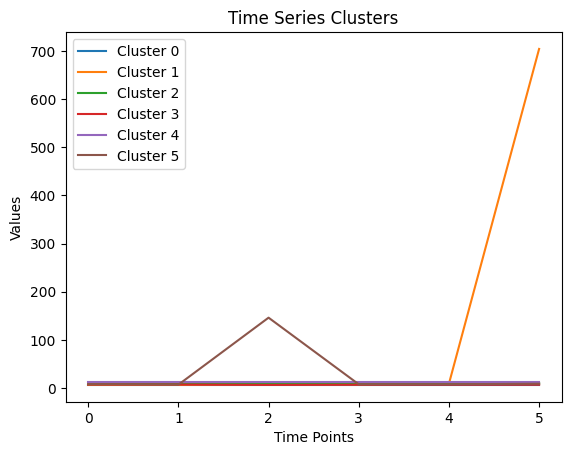

In [33]:
cluster_assignments = model.predict(reshaped_array)
cluster_centers = model.cluster_centers_
for i in range(model.n_clusters):
    cluster_samples = reshaped_array[cluster_assignments == i]
    plt.plot(cluster_samples[0, :, 0], label=f'Cluster {i}')

plt.title('Time Series Clusters')
plt.xlabel('Time Points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [ ]:

# Assuming reshaped_array is the NumPy array in the required format
inertia_values = []

# Try different cluster values
for n_clusters in range(2, 10):
    model = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", max_iter=10)
    model.fit(reshaped_array)
    inertia = model.inertia_
    inertia_values.append(inertia)

# Plot the elbow curve
plt.plot(range(2, 10), inertia_values, marker='o')
plt.title('Elbow Method for Optimal n_clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [40]:
# Assuming model is your TimeSeriesKMeans model
cluster_assignments = model.predict(reshaped_array)

# Create a DataFrame with patient ID and cluster assignment
cluster_df = pd.DataFrame({'deid_pat_ID': reshaped_df.index, 'cluster': cluster_assignments})

# Merge cluster_df with df_first_six on 'deid_pat_ID'
df_first_six_ctn = pd.merge(df_first_six_ctn, cluster_df, on='deid_pat_ID')

# Group df_first_six by 'cluster'
grouped_data = df_first_six_ctn.groupby('cluster')

# Calculate Mean and Median for Each Cluster
cluster_statistics = grouped_data[['BP_Diastolic', 'Triglycerides', 'HDL', 'BMI', 'GFR', 'LDL']].agg(['mean', 'median'])


In [41]:
print(cluster_statistics)

        BP_Diastolic        Triglycerides               HDL               BMI  \
                mean median          mean median       mean median       mean   
cluster                                                                         
0          77.995526   78.0    163.514895  131.0  46.977510   45.0  35.382427   
1          69.750000   67.5     66.000000   66.0  41.000000   41.0  43.223750   
2          78.498710   79.0    198.154068  152.0  44.644817   43.0  35.410282   
3          78.156624   79.0    179.491572  143.0  45.712108   44.0  35.369496   
4          78.985585   80.0    216.082518  147.0  46.420213   44.0  35.693226   
5          79.333333   78.0    189.333333  180.0  32.833333   32.0  32.366667   

                           GFR                LDL         
            median        mean median        mean median  
cluster                                                   
0        34.200000   71.899757   60.0  100.984596   95.0  
1        37.410000  111.000000  11